# <center> MNIST Digit Classification </center>
## <center> Logistic Regression </center>

### Importing Libraries
- ***Purpose***: This cell imports necessary libraries:

    - `sklearn`: Provides tools for machine learning and data processing.
    - `matplotlib`.pyplot: Used for plotting and visualizing data.
    - `numpy`: Useful for numerical computations, especially with arrays.

In [4]:
import sklearn
import sklearn.datasets
import matplotlib.pyplot as plt
import numpy as np

### Loading and Visualizing Data
- ***Purpose***: This cell loads the MNIST dataset (a set of 28x28 pixel images of handwritten digits) and displays the first 10 images with their corresponding labels.

    - `fetch_openml`: Loads the MNIST dataset.
    - The loop iterates over the first 10 images and labels, displaying them using matplotlib.

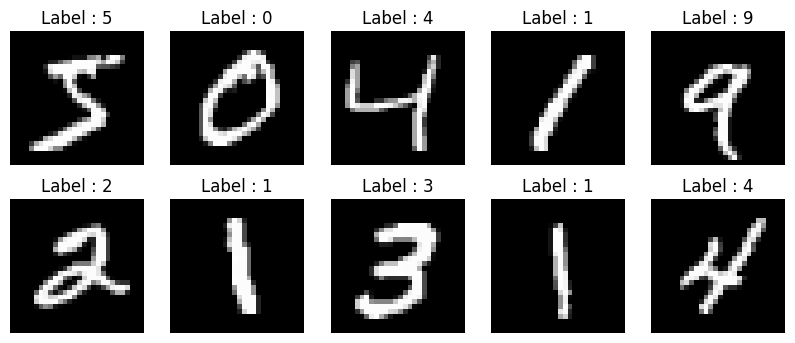

In [41]:
X, y = sklearn.datasets.fetch_openml('mnist_784', return_X_y=True, as_frame=False)
X.shape, y.shape

plt.figure(figsize=(10,4))
for index, (image, label) in enumerate(zip(X[0:10], y[0:10])):
    plt.subplot(2, 5, index+1)
    plt.imshow(np.reshape(image, (28,28)), cmap=plt.cm.gray)
    plt.title('Label : ' + label)
    plt.axis('off')
plt.show()

### Data Preprocessing and Visualization
- ***Purpose*** : This cell splits the data into training and test sets, normalizes the pixel values, and visualizes the class distribution.

    - *`train_test_split`*: Splits the data into training and test sets.
    - The images are scaled by dividing by 255 to normalize pixel values between 0 and 1.
    - The histograms visualize the distribution of classes (digits) in both training and test sets.

(60000, 784) (10000, 784)


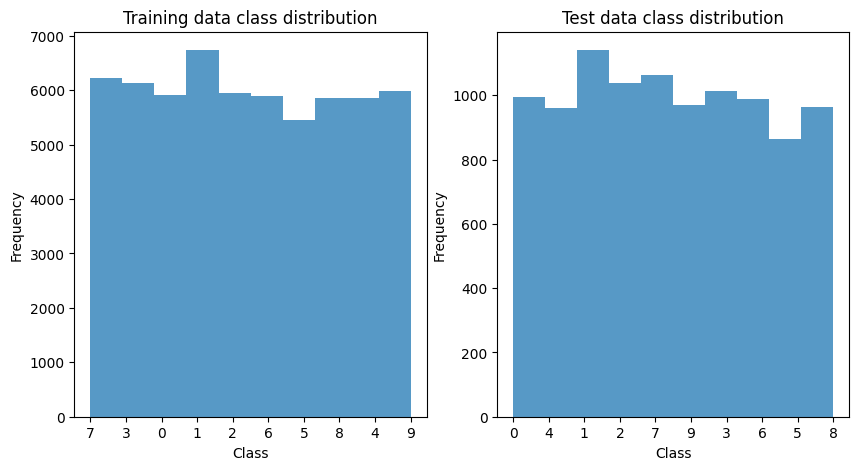

In [46]:
from sklearn.model_selection import train_test_split, GridSearchCV

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=1/7.0,random_state=0)
print(X_train.shape , X_test.shape)

X_train = X_train.astype('float32') / 255.
X_test = X_test.astype('float32') / 255.

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.hist(y_train, bins=10, alpha=0.75)
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.title('Training data class distribution')

plt.subplot(1,2,2)
plt.hist(y_test, bins=10, alpha=0.75)
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.title('Test data class distribution')

plt.show()

### Training Logistic Regression Model
- ***Purpose*** : This cell trains a logistic regression model on the training data.

    - *`LogisticRegression`* : Instantiates the model with specified parameters.
    - *`fit`* : Trains the model using the training data.

In [43]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(fit_intercept = True,
                            multi_class = 'auto',
                            penalty='l1',
                            solver='saga',
                            max_iter=1000,
                            C=50,
                            verbose=2,
                            n_jobs=5,
                            tol=0.01)

logreg.fit(X_train, y_train)

c:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
[Parallel(n_jobs=5)]: Using backend ThreadingBackend with 5 concurrent workers.


convergence after 57 epochs took 193 seconds


LogisticRegression(C=50, max_iter=1000, multi_class='auto', n_jobs=5,
                   penalty='l1', solver='saga', tol=0.01, verbose=2)

### Visualizing Model Coefficients
- ***Purpose*** : This cell visualizes the coefficients of the logistic regression model for each class (digit).

    - The coefficients are reshaped to match the 28x28 pixel images, showing how each pixel influences the classification.

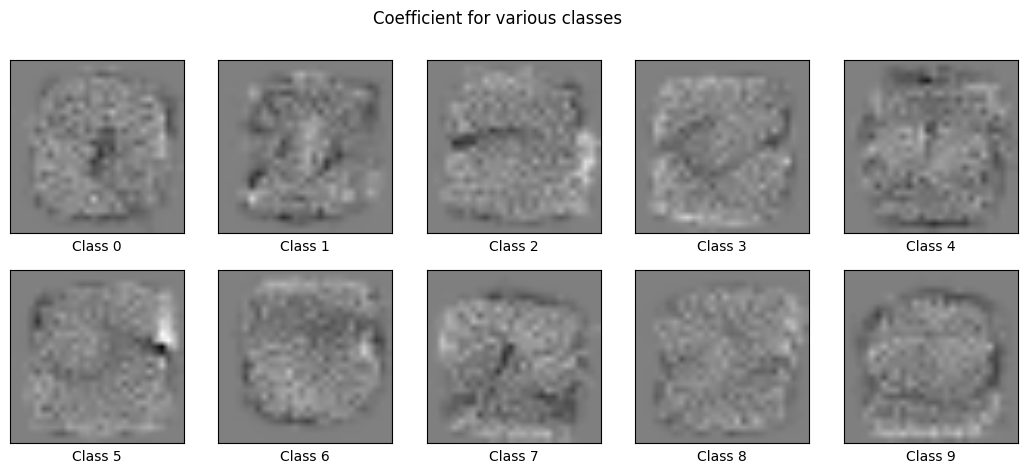

In [50]:
coef = logreg.coef_.copy()
scale = np.abs(coef).max()

plt.figure(figsize=(13,5))
for i in range(10):
    coef_plot = plt.subplot(2,5,i+1)
    coef_plot.imshow(coef[i].reshape(28,28),cmap=plt.cm.gray, vmin=-scale, vmax=scale, interpolation='bilinear')
    coef_plot.set_xticks(());coef_plot.set_yticks(())
    coef_plot.set_xlabel(f'Class {i}')
    plt.suptitle('Coefficient for various classes')
plt.show()

### Making Predictions and Evaluating the Model
- ***Purpose*** : This cell makes predictions on the test data, visualizes some of the predictions, and prints the training and test scores.

    - `predict`: Uses the trained model to predict labels for the test set.
    - The loop displays the first 10 test images alongside their true labels and predicted labels.
    - Finally, the training and test accuracies are printed. ​

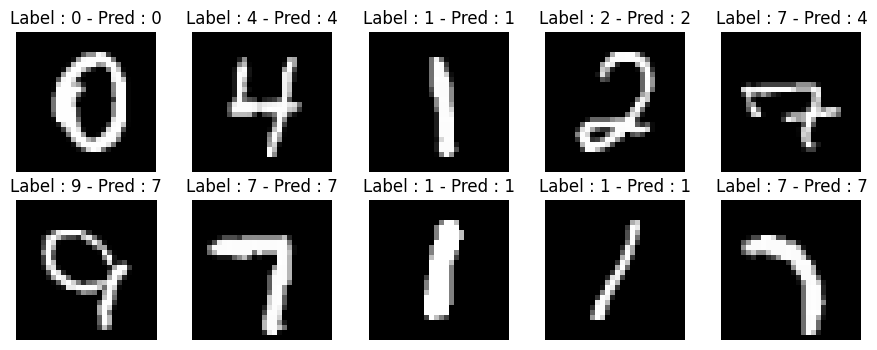

Training Score : 0.93895
Test Score : 0.9201


In [45]:
predictions = logreg.predict(X_test)

plt.figure(figsize=(11,4))
for index, (image, label, pred) in enumerate(zip(X_test[0:10], y_test[0:10], predictions[0:10])):
    plt.subplot(2, 5, index+1)
    plt.imshow(np.reshape(image, (28,28)), cmap=plt.cm.gray)
    plt.title(f'Label : {label} - Pred : {pred}')
    plt.axis('off')
plt.show()

print(f'Training Score : {logreg.score(X_train, y_train)}')
print(f'Test Score : {logreg.score(X_test, y_test)}')